In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [164]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [173]:
pd.pivot_table(data, index = 'ocean_proximity', values = ['median_house_value'])

,median_house_value
ocean_proximity,
<1H OCEAN,240267.990812
INLAND,124896.863147
ISLAND,380440.000000
NEAR BAY,259279.292070
NEAR OCEAN,249042.355023


In [174]:
rooms_per_house = pd.pivot_table(data, index = 'ocean_proximity', 
                                 values = ['total_rooms', 'households'], aggfunc = 'sum')
rooms_per_house

,households,total_rooms
ocean_proximity,,
<1H OCEAN,4674364.0,23734427.0
INLAND,3105133.0,17677259.0
ISLAND,1383.0,7873.0
NEAR BAY,1106026.0,5653061.0
NEAR OCEAN,1318018.0,6799071.0


In [175]:
rooms_per_house['n_rooms'] = rooms_per_house['total_rooms'] / rooms_per_house['households']
rooms_per_house

,households,total_rooms,n_rooms
ocean_proximity,,,
<1H OCEAN,4674364.0,23734427.0,5.077574
INLAND,3105133.0,17677259.0,5.692915
ISLAND,1383.0,7873.0,5.692697
NEAR BAY,1106026.0,5653061.0,5.111147
NEAR OCEAN,1318018.0,6799071.0,5.158557


In [165]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [167]:
miss_pt = (data.isnull().sum())/len(data)
miss_pt

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [168]:
data = data.dropna()
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [169]:
num_col = [c for c in data.columns if data[c].dtype == 'float64' and c != 'median_house_value']
num_col

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

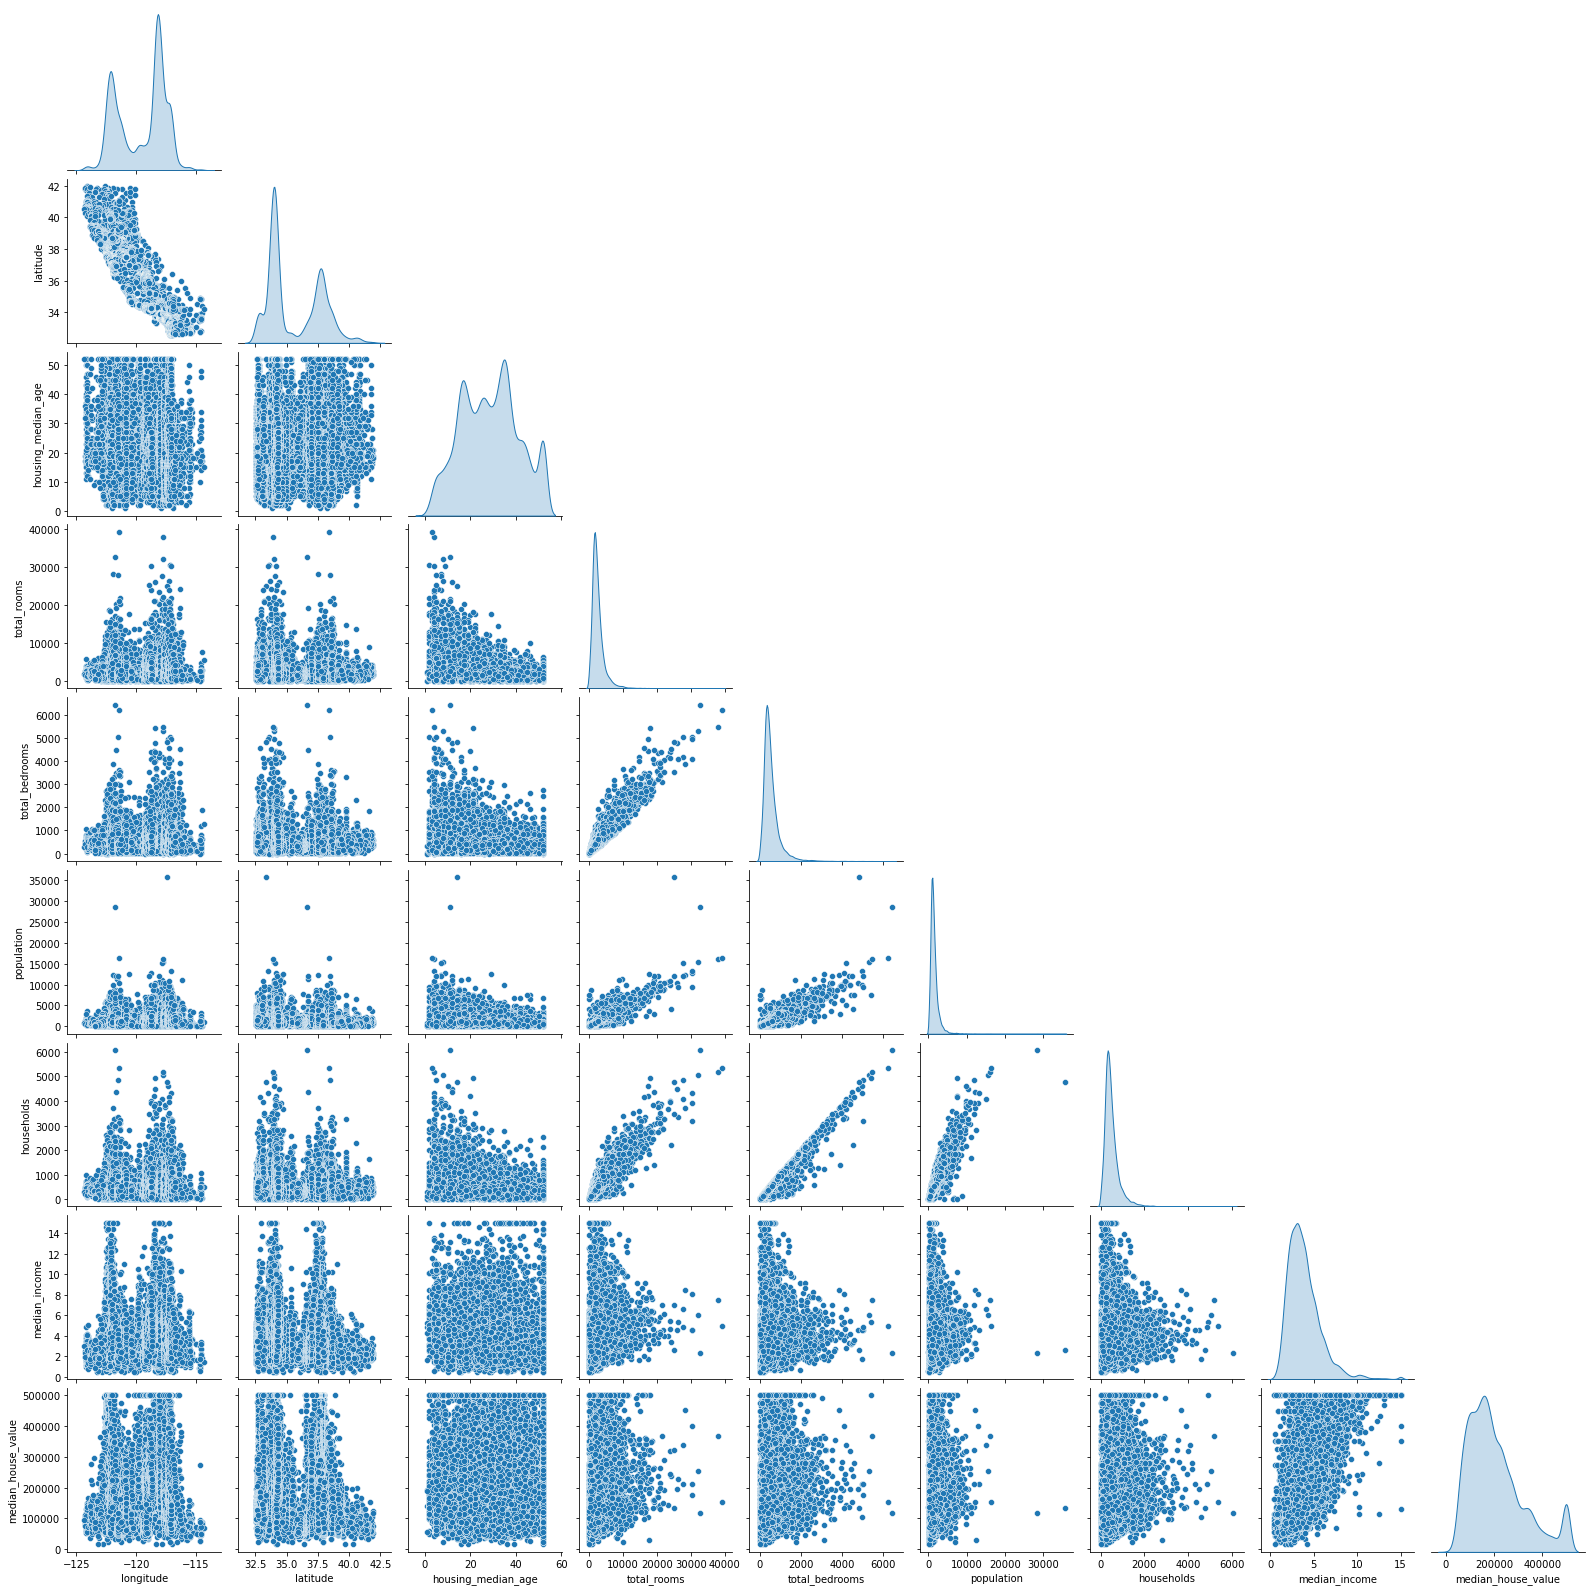

In [171]:
sns.pairplot(data, diag_kind="kde", corner=True)
plt.show()

In [148]:
data['pop_per_hou'] = data['population']/data['households']
data['room_per_hou'] = data['total_rooms']/data['households']
data['bed_per_hou'] = data['total_bedrooms']/data['households']

Text(0.5, 1.0, 'Elbow curve')

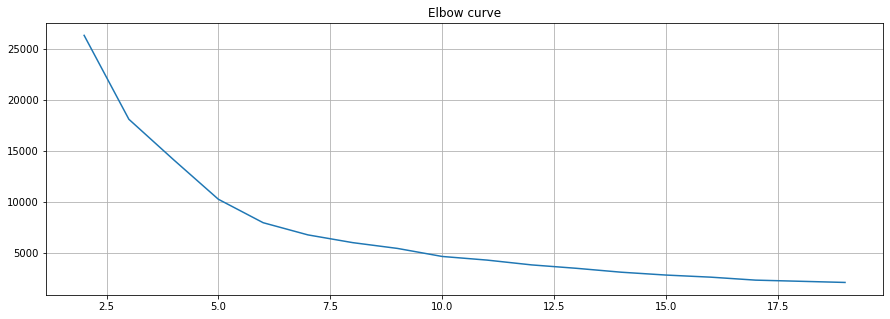

In [149]:
# k-means clustering
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

geo = data[['longitude', 'latitude']]
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(geo)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [150]:
import collections
kmeans = KMeans(n_clusters=13)
kmeans.fit(geo)
cluster = pd.Series(kmeans.predict(geo), dtype = 'object')
cluster_size = collections.Counter(cluster)
c_size = pd.Series([cluster_size[x] for x in cluster], dtype = 'float64')

# data['cluster'] = cluster
data['c_size'] = c_size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  pop_per_hou         20433 non-null  float64
 11  room_per_hou        20433 non-null  float64
 12  bed_per_hou         20433 non-null  float64
 13  c_size              20433 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.2+ MB


In [151]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,pop_per_hou,room_per_hou,bed_per_hou,c_size
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433,20433.000000,20433.000000,20433.000000,20433.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034,NaN,NaN,NaN,NaN
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN,3.071533,5.431344,1.097062,3350.304556
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN,10.438269,2.482946,0.476104,2411.735672
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN,0.692308,0.846154,0.333333,222.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN,2.429032,4.441441,1.006029,1340.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN,2.817582,5.230769,1.048889,2053.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN,3.281513,6.052381,1.099631,6657.000000


In [152]:
# one-hot for ocean
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse=False, drop='first')
ocean_encode = pd.DataFrame(OH_encoder.fit_transform(pd.DataFrame(data['ocean_proximity'])))
ocean_encode.columns = OH_encoder.get_feature_names()
data0 = pd.concat([data, ocean_encode], axis=1)
data0.drop(['ocean_proximity'], axis=1, inplace=True)
data0.head()

/Users/taozhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pop_per_hou,room_per_hou,bed_per_hou,c_size,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.555556,6.984127,1.023810,3116.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2.109842,6.238137,0.971880,3116.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2.802260,8.288136,1.073446,3116.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2.547945,5.817352,1.073059,3116.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2.181467,6.281853,1.081081,3116.0,0.0,0.0,1.0,0.0


In [153]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   pop_per_hou         20433 non-null  float64
 10  room_per_hou        20433 non-null  float64
 11  bed_per_hou         20433 non-null  float64
 12  c_size              20433 non-null  float64
 13  x0_INLAND           20433 non-null  float64
 14  x0_ISLAND           20433 non-null  float64
 15  x0_NEAR BAY         20433 non-null  float64
 16  x0_N

In [154]:
x = data0.drop(['median_house_value'], axis = 1)
y = data0['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [155]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   pop_per_hou         20433 non-null  float64
 9   room_per_hou        20433 non-null  float64
 10  bed_per_hou         20433 non-null  float64
 11  c_size              20433 non-null  float64
 12  x0_INLAND           20433 non-null  float64
 13  x0_ISLAND           20433 non-null  float64
 14  x0_NEAR BAY         20433 non-null  float64
 15  x0_NEAR OCEAN       20433 non-null  float64
dtypes: f

In [156]:
z_scores = scipy.stats.zscore(x_train[num_col])
filtered_data = (np.abs(z_scores)<6).all(axis=1)
x_train = x_train[filtered_data]
y_train = y_train[filtered_data]
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,pop_per_hou,room_per_hou,bed_per_hou,c_size,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
count,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000,16261.000000
mean,-119.568466,35.630629,28.741098,2548.664842,521.725294,1383.527089,485.244019,3.875911,3.031672,5.428964,1.096579,3355.685075,0.317631,0.000307,0.111494,0.128098
std,2.002628,2.134908,12.558934,1809.713973,359.630237,946.100293,327.478531,1.923605,9.940126,2.450137,0.443648,2413.764979,0.465569,0.017533,0.314752,0.334209
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,0.692308,0.846154,0.375000,222.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.790000,33.930000,18.000000,1445.000000,294.000000,782.000000,279.000000,2.559200,2.430180,4.436693,1.005263,1340.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.250000,29.000000,2111.000000,433.000000,1161.000000,408.000000,3.535700,2.823838,5.221477,1.048069,2053.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3113.000000,640.000000,1711.000000,598.000000,4.746400,3.287356,6.045181,1.098295,6657.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,15502.000000,2953.000000,7817.000000,2753.000000,15.000100,1243.333333,141.909091,25.636364,6657.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,pop_per_hou,room_per_hou,bed_per_hou,c_size,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
1317,-121.90,38.03,51.0,2982.0,689.0,1831.0,608.0,2.0034,3.011513,4.904605,1.133224,3116.0,1.0,0.0,0.0,0.0
13486,-117.25,34.13,37.0,2498.0,472.0,1291.0,487.0,3.0000,2.650924,5.129363,0.969199,2053.0,1.0,0.0,0.0,0.0
16110,-121.24,37.96,29.0,874.0,217.0,788.0,222.0,1.9187,3.549550,3.936937,0.977477,947.0,1.0,0.0,0.0,0.0
7808,-118.08,33.85,19.0,4261.0,678.0,2621.0,661.0,6.2427,3.965204,6.446293,1.025719,6657.0,0.0,0.0,0.0,0.0
3290,-122.79,39.02,23.0,642.0,203.0,265.0,84.0,1.8833,3.154762,7.642857,2.416667,3116.0,1.0,0.0,0.0,0.0


In [158]:
# standardize
from sklearn.preprocessing import StandardScaler
num_col.append('c_size')
scaler = StandardScaler()
x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])
x_train.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,pop_per_hou,room_per_hou,bed_per_hou,c_size,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
count,1.626100e+04,1.626100e+04,1.626100e+04,1.626100e+04,1.626100e+04,1.626100e+04,1.626100e+04,1.626100e+04,16261.000000,16261.000000,16261.000000,1.626100e+04,16261.000000,16261.000000,16261.000000,16261.000000
mean,2.087540e-15,2.622109e-17,-3.254679e-17,3.038929e-17,4.710306e-17,-1.618122e-17,2.066690e-17,-1.739789e-16,3.031672,5.428964,1.096579,-1.571695e-17,0.317631,0.000307,0.111494,0.128098
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,9.940126,2.450137,0.443648,1.000031e+00,0.465569,0.017533,0.314752,0.334209
min,-2.387702e+00,-1.447708e+00,-2.208942e+00,-1.407263e+00,-1.445210e+00,-1.459221e+00,-1.475696e+00,-1.755098e+00,0.692308,0.846154,0.375000,-1.298296e+00,0.000000,0.000000,0.000000,0.000000
25%,-1.109343e+00,-7.966065e-01,-8.552819e-01,-6.098747e-01,-6.332401e-01,-6.358159e-01,-6.298134e-01,-6.845231e-01,2.430180,4.436693,1.005263,-8.351049e-01,0.000000,0.000000,0.000000,0.000000
50%,5.385419e-01,-6.467125e-01,2.061557e-02,-2.418494e-01,-2.467201e-01,-2.352118e-01,-2.358823e-01,-1.768669e-01,2.823838,5.221477,1.048069,-5.397067e-01,0.000000,0.000000,0.000000,0.000000
75%,7.782343e-01,9.787004e-01,6.576319e-01,3.118462e-01,3.288888e-01,3.461398e-01,3.443262e-01,4.525437e-01,3.287356,6.045181,1.098295,1.367746e+00,1.000000,0.000000,0.000000,0.000000
max,2.625863e+00,2.960111e+00,1.852038e+00,7.157890e+00,6.760693e+00,6.800199e+00,6.925113e+00,5.783168e+00,1243.333333,141.909091,25.636364,1.367746e+00,1.000000,1.000000,1.000000,1.000000


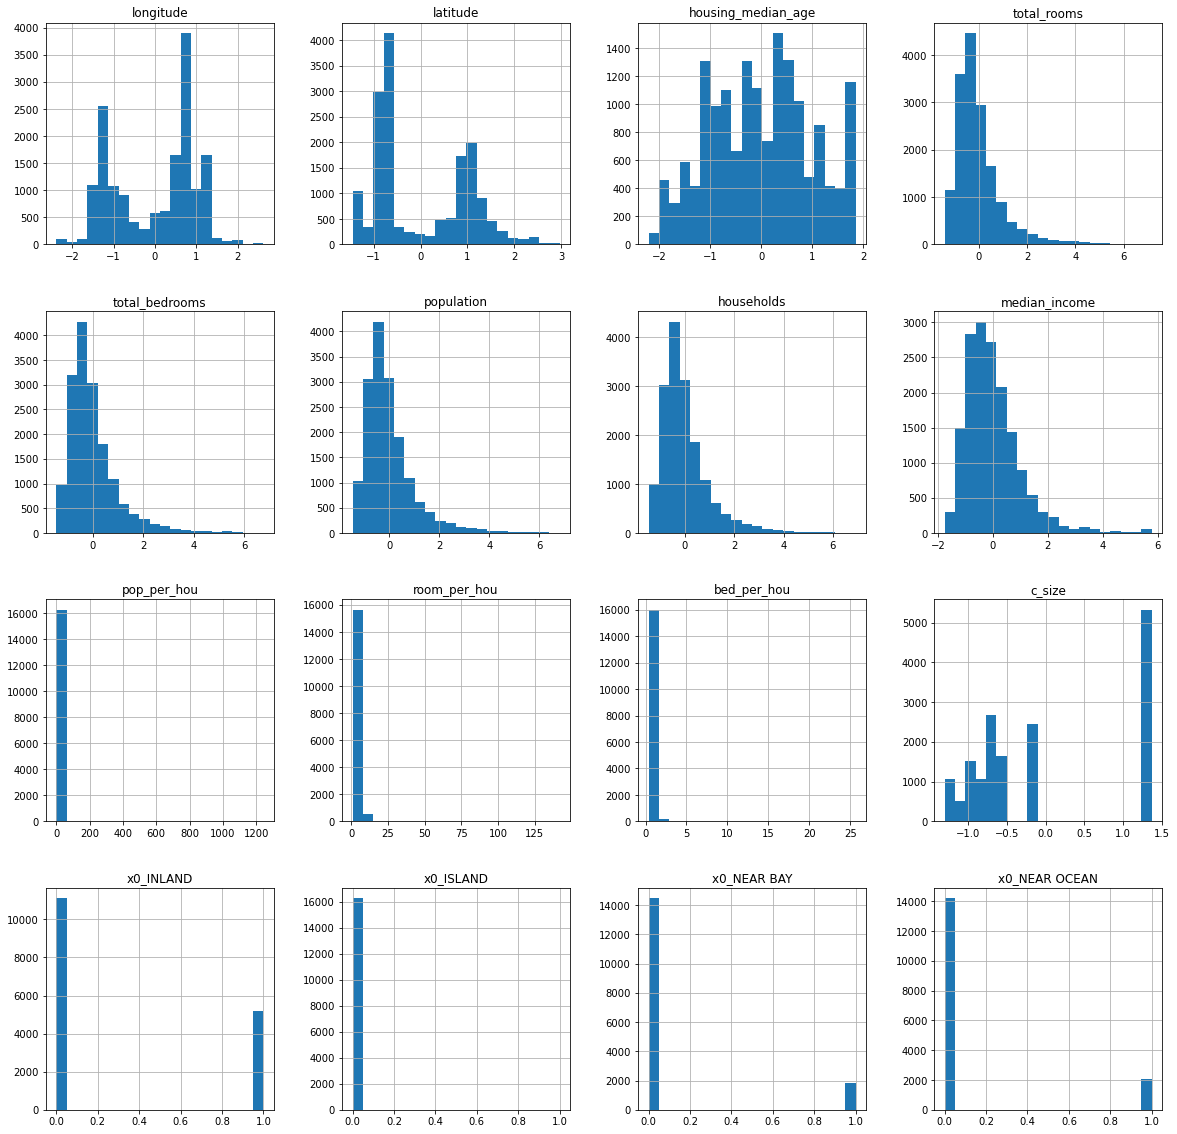

In [159]:
x_train.hist(bins = 20, figsize = (20, 20))
plt.show()

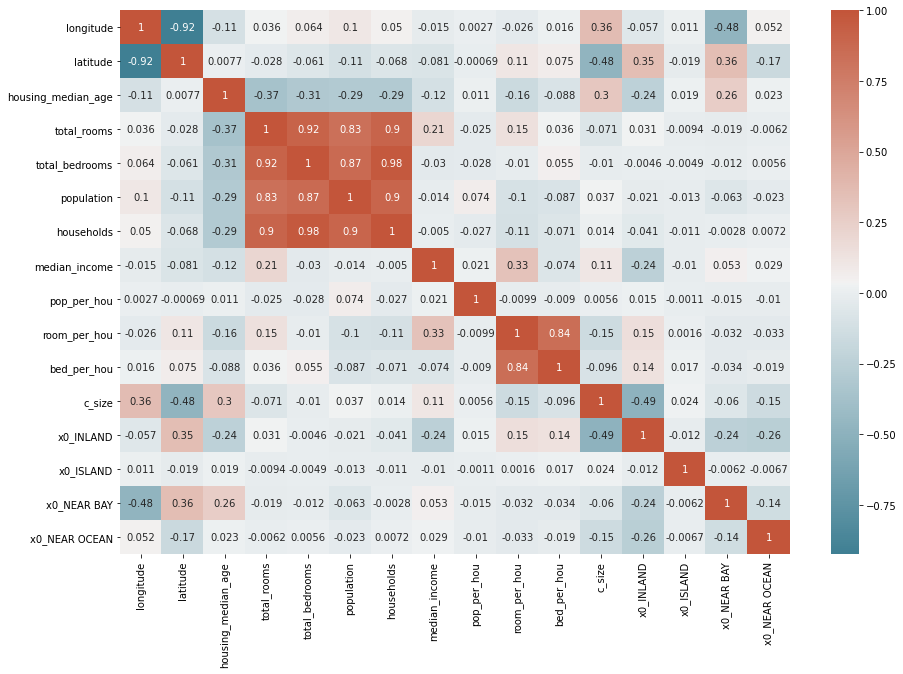

In [160]:
corr = x_train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

67044.04376318451
68582.9158594955


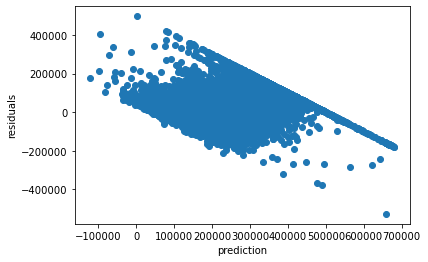

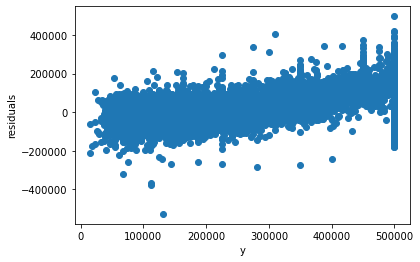

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr_res = lr.fit(x_train, y_train)
pred_train_lr= lr_res.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
pred_test_lr= lr_res.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
residuals = y_train - pred_train_lr
plt.scatter(pred_train_lr, residuals)
plt.xlabel('prediction')
plt.ylabel('residuals')
plt.show()
plt.scatter(y_train, residuals)
plt.xlabel('y')
plt.ylabel('residuals')
plt.show()

In [162]:
x_ols = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_ols)
sm_ols = ols.fit()
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2007.
Date:                Sat, 16 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:21:42   Log-Likelihood:            -2.0378e+05
No. Observations:               16261   AIC:                         4.076e+05
Df Residuals:                   16244   BIC:                         4.077e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.966e+05   1940.533    101.314      0.000    1.93e+05       2e+05
longitude          -5.993e+04   2266.137    -26.445      0.000   -6.44e+04   -5.55e+04
latitude           -5.752e+04   2382.590    -24.142      0.000   -6.22e+04   -5.29e+04
housing_median_age  9709.6821    638.587     15.205      0.000    8457.981     1.1e+04
total_rooms        -2990.2809   2187.056     -1.367      0.172   -7277.152    1296.590
total_bedrooms      1.901e+04   3559.202      5.341      0.000     1.2e+04     2.6e+04
population         -4.799e+04   1316.130    -36.464      0.000   -5.06e+04   -4.54e+04
households          3.632e+04   3381.551     10.741      0.000    2.97e+04    4.29e+04
median_income       7.377e+04    881.361     83.695      0.000     7.2e+04    7.55e+04
pop_per_hou           75.9898     54.595      1.392      0.164     -31.021     183.001
room_per_hou       -1556.5727    782.868     -1.988      0.047   -3091.081     -22.065
bed_per_hou         2.127e+04   4005.055      5.312      0.000    1.34e+04    2.91e+04
c_size              1.371e+04    766.229     17.888      0.000    1.22e+04    1.52e+04
x0_INLAND          -2.323e+04   2079.903    -11.168      0.000   -2.73e+04   -1.92e+04
x0_ISLAND           1.399e+05   3.01e+04      4.654      0.000     8.1e+04    1.99e+05
x0_NEAR BAY         3577.7707   2132.046      1.678      0.093    -601.275    7756.816
x0_NEAR OCEAN       1.685e+04   1881.389      8.955      0.000    1.32e+04    2.05e+04
==============================================================================
Omnibus:                     3531.214   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11424.479
Skew:                           1.100   Prob(JB):                         0.00
Kurtosis:                       6.468   Cond. No.                         604.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 9, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [200, 300, 400]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, 
                               verbose=0, random_state=33, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)
pred_rf_random_train = rf_random.best_estimator_.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_rf_random_train)))
pred_rf_random_test = rf_random.best_estimator_.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_rf_random_test)))

55450.3322840087
57859.09656012022
